## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

filename = 'credict_data_german.csv'

df = pd.read_csv(filename, sep=",")

df.head()

,checking account,duration [month],credit history,purpose,amount,savings,employment,installment,status,debtors,...,property,age [years],plans,housing,existing credits,job,maintaining people,phone registered,foreign worker,classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,good
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,bad
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,good
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,good
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,bad


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   checking account    1000 non-null   object
 1   duration [month]    1000 non-null   int64 
 2   credit history      1000 non-null   object
 3   purpose             1000 non-null   object
 4   amount              1000 non-null   int64 
 5   savings             1000 non-null   object
 6   employment          1000 non-null   object
 7   installment         1000 non-null   int64 
 8   status              1000 non-null   object
 9   debtors             1000 non-null   object
 10  resident since      1000 non-null   int64 
 11  property            1000 non-null   object
 12  age [years]         1000 non-null   int64 
 13  plans               1000 non-null   object
 14  housing             1000 non-null   object
 15  existing credits    1000 non-null   int64 
 16  job                 1000 

# Aufgabe A: Korrelation zwischen intervallskalierten Variablen
### Erstellen Sie ein Balkendiagramm, welches die 10 stärksten Korrelationen zwischen intervallskalierten Variablen sortiert visuell darstellt (von hoher Korrelation zu niedriger Korrelation). 

In [4]:
df_corr = df.corr()
df_corr

,duration [month],amount,installment,resident since,age [years],existing credits,maintaining people
duration [month],1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834
amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142
installment,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207
resident since,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643
age [years],-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201
existing credits,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667
maintaining people,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000


In [5]:
correlations = df.corr().unstack().sort_values(ascending=False).drop_duplicates()
corr_vals = list(df.corr().unstack().sort_values(ascending=False).drop_duplicates())
corr_vals = corr_vals[1:10]


corr_vals

[0.6249841983009851,
 0.266419183969461,
 0.14925358219009058,
 0.11820083281906714,
 0.10966670041593389,
 0.08962523262254277,
 0.07474881629117033,
 0.0582656843514099,
 0.04930237081388658]

In [6]:
correlations

duration [month]    duration [month]      1.000000
                    amount                0.624984
age [years]         resident since        0.266419
existing credits    age [years]           0.149254
maintaining people  age [years]           0.118201
existing credits    maintaining people    0.109667
                    resident since        0.089625
duration [month]    installment           0.074749
installment         age [years]           0.058266
                    resident since        0.049302
maintaining people  resident since        0.042643
resident since      duration [month]      0.034067
age [years]         amount                0.032716
resident since      amount                0.028926
installment         existing credits      0.021669
existing credits    amount                0.020795
maintaining people  amount                0.017142
duration [month]    existing credits     -0.011284
maintaining people  duration [month]     -0.023834
age [years]         duration [m

In [7]:
labels = ['duration [month] - amount', 'age [years] - resident since', 'existing credits - age [years]', 'maintaining people - age [years]', 'existing credits - maintaining people', 'existing credits - resident since', 'duration [month] - installment', 'installment - age [years]', 'installment - resident since']

In [8]:
print(len(corr_vals), len(labels))

9 9


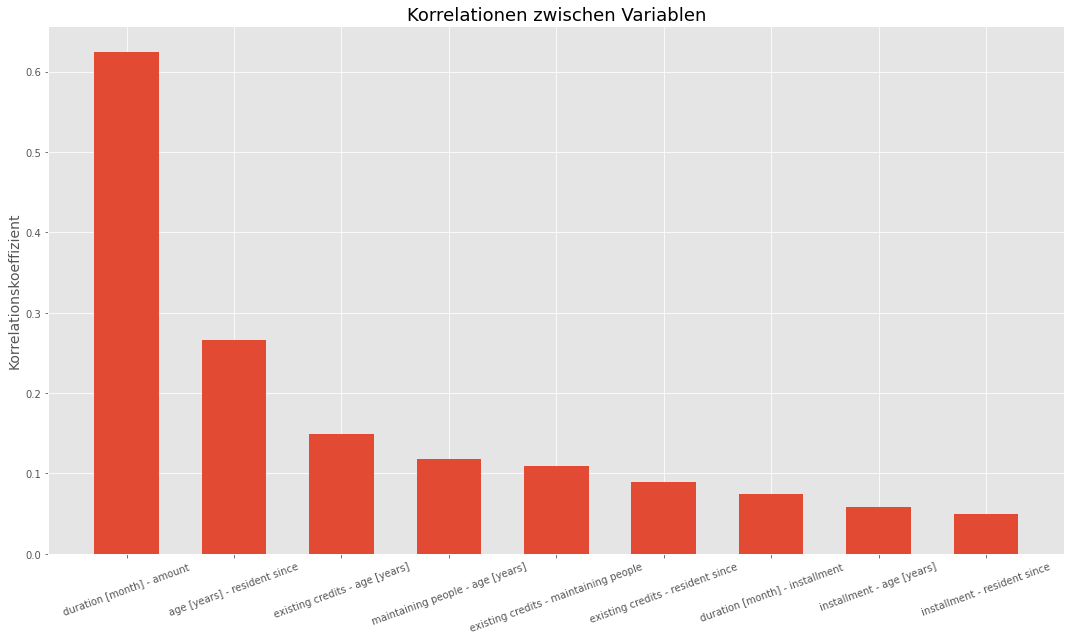

In [9]:
#Graphengröße festlegen
plt.figure(figsize=(15,9))

style.use('ggplot')

#Plot Graph
plt.bar(labels, corr_vals, width=0.6)

#Achsen-Label rotieren
plt.xticks(rotation = 20)

#Title einfügen
plt.title("Korrelationen zwischen Variablen", size = 18)
#Achsenbeschriftung
#plt.xlabel("Variablen")
plt.ylabel("Korrelationskoeffizient", size = 14)

plt.tight_layout()

plt.show()

# Aufgabe B: Bewertung von Gruppen
### Messen Sie die stat. Abhängig von duration mit der Zielvariablen classification. Stellen Sie die Mittelwerte und Std-Abweichungen von duration getrennt nach den Ausprägungen der Zielvariablen visuell dar.

In [10]:
df.columns

Index(['checking account', 'duration [month]', 'credit history', 'purpose',
       'amount', 'savings', 'employment', 'installment', 'status', 'debtors',
       'resident since', 'property', 'age [years]', 'plans', 'housing',
       'existing credits', 'job', 'maintaining people', 'phone registered',
       'foreign worker', 'classification'],
      dtype='object')

In [11]:
df['classint'] = (df['classification'] == 'good').astype(int)

df

,checking account,duration [month],credit history,purpose,amount,savings,employment,installment,status,debtors,...,age [years],plans,housing,existing credits,job,maintaining people,phone registered,foreign worker,classification,classint
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,67,A143,A152,2,A173,1,A192,A201,good,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,22,A143,A152,1,A173,1,A191,A201,bad,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,49,A143,A152,1,A172,2,A191,A201,good,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,45,A143,A153,1,A173,2,A191,A201,good,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,53,A143,A153,2,A173,2,A191,A201,bad,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,31,A143,A152,1,A172,1,A191,A201,good,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,40,A143,A152,1,A174,1,A192,A201,good,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,38,A143,A152,1,A173,1,A191,A201,good,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,23,A143,A153,1,A173,1,A192,A201,bad,0


In [12]:
df['duration [month]'].corr(df['classint'])

-0.2149266654418909

In [13]:
means_df = df.groupby(df['classint']).mean()

In [14]:
std_df = df.groupby(df['classint']).std()

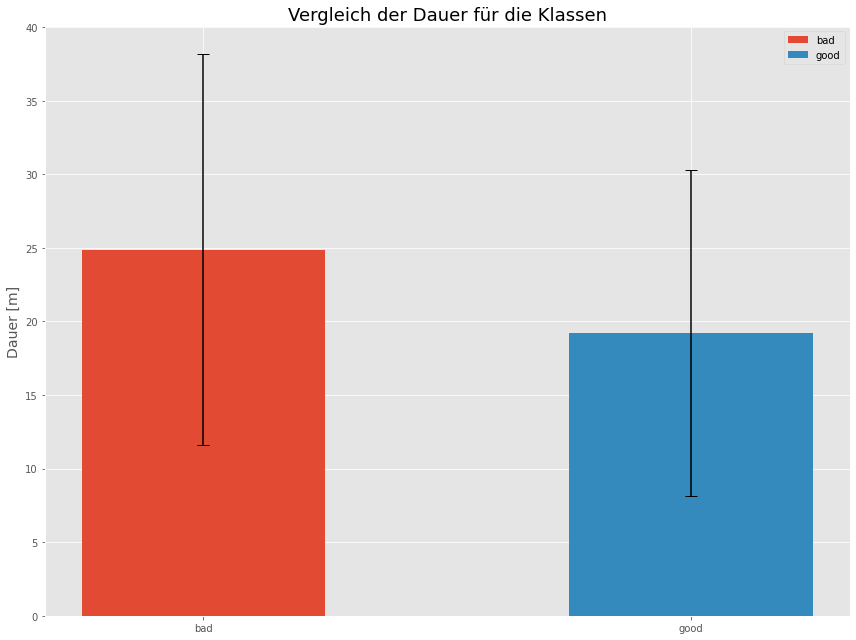

In [15]:
plt.figure(figsize=(12, 9))

style.use('ggplot')

plt.bar('bad', means_df['duration [month]'][0], yerr = std_df['duration [month]'][0], capsize = 6, width = 0.5, label = 'bad')
plt.bar('good', means_df['duration [month]'][1], yerr = std_df['duration [month]'][1], capsize = 6, width = 0.5, label = 'good')

plt.title('Vergleich der Dauer für die Klassen', size = 18)
plt.ylabel('Dauer [m]',size = 14)

plt.legend()

plt.tight_layout()

plt.show()

# Aufgabe C: Bewertung kategorischer Variablen
### Geben Sie die Kontingenztabelle von i) checking account vs classification und ii) job vs classification mitsamt X²-Wert und p-Wert an. Welche Aussage kann aus dem p-Wert und der Kontingenztabelle abgeleitet werden?

In [25]:
pd.crosstab(index=df['classification'], columns=df['checking account'], normalize='index')

checking account,A11,A12,A13,A14
classification,,,,
bad,0.450000,0.350000,0.046667,0.153333
good,0.198571,0.234286,0.070000,0.497143


In [26]:
pd.crosstab(index=df['classification'], columns=df['job'], normalize='index')

job,A171,A172,A173,A174
classification,,,,
bad,0.023333,0.186667,0.620000,0.170000
good,0.021429,0.205714,0.634286,0.138571
